In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import rcParams

In [3]:
df = pd.read_csv("Pokemon.csv",index_col=0)
df.head(19)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,3,False
7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
8,Wartortle,Water,NaN,405,59,63,80,65,80,58,2,False
9,Blastoise,Water,NaN,530,79,83,100,85,105,78,3,False


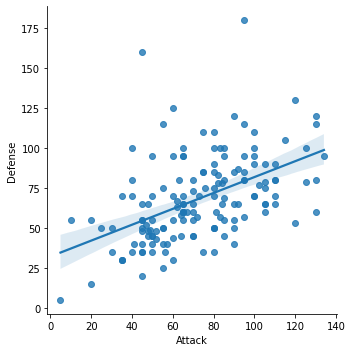

In [4]:
sns.lmplot(x ="Attack",y="Defense",data=df) #lmplot fonksiyonu bize regresyon çizgisini saçılım grafiğine oturtarak verir.
                                            # Alternatif Yöntem
                                            #sns.lmplot(x=df.Attack, y=df.Defense)


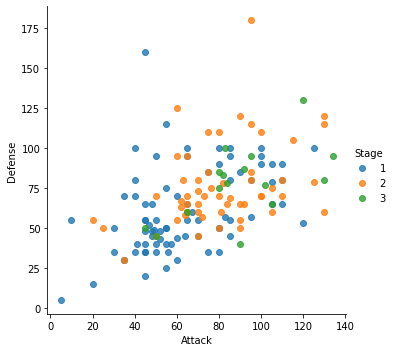

In [5]:
# yine de saçılım grafiği oluşturabilmek için bu fonk.da değişiklik yapabiliyoruz.
sns.lmplot(x = 'Attack', y = 'Defense', fit_reg = False, hue = 'Stage', data = df)

fit_reg: Bu argümanın değerini False yaptığımız zaman grafik üstündeki regresyon doğrusunu kaldırıyor.

hue: Bu argümanın değerini 'Stage' yaptığımız zaman Pokémon’ların gelişim evrelerine göre renklendirme yapıyor. Bu özellik sayesinde grafiğimize üçüncü bir boyut katmış oluyoruz

bütün Pokémon’ların mücadele istatistiklerini kutu grafiği kullanarak görselleştirelim.

<AxesSubplot:>

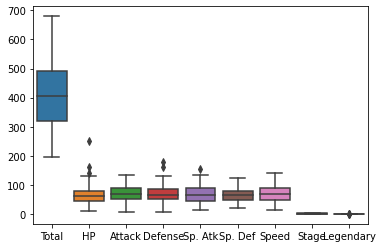

In [6]:
sns.boxplot(data= df)

Gayet güzel! Ancak kaldırmamız gereken birkaç sütun var.Bunlar:

Total
Stage ve Legendary. Çünkü bu iki değişken mücadele istatistiği değil.

Görüldüğü gibi sadece Seaborn ile bu işlemler kolay olmuyor. Bu yüzden veriye ön biçimlendirme yapmak zorundayız

<AxesSubplot:>

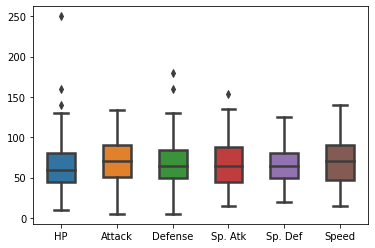

In [7]:
stats_df = df.drop(["Total", "Stage", "Legendary"], axis=1)
sns.boxplot(data= stats_df, linewidth= 2.5, width= 0.50)

linewidth:Bu argüman yardımıyla her bir kutunun arasındaki mesafeyi belirliyoruz.

width:Bu argüman ile her bir kutunun genişliğini belirliyoruz

Şimdi ise violin grafiği yaparken farklı bir tema kullanalım.

Violin (keman) grafiği, kutu grafiğinin alternatifidir.
Sadece özet istatistikleri göstermek yerine dağılımları gösterir.
Örnek olarak Pokémon’ların saldırı değerlerinin temel tiplerine göre dağılımlarını gösterelim.

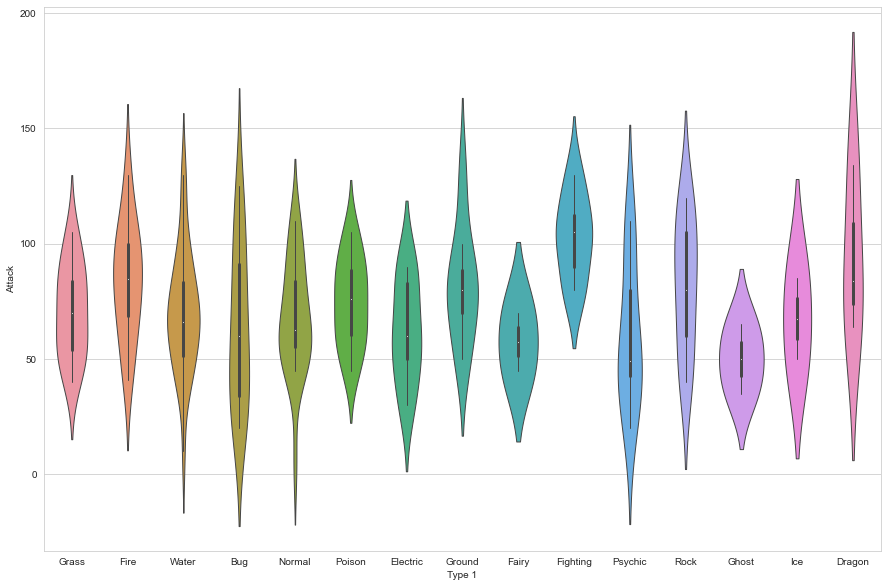

In [8]:
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
sns.violinplot(x = "Type 1", y= "Attack", data= df, linewidth=1); 


In [9]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

pokemonların sınıfları ile renklerini denkleştirmek için yukarıda bir değişkene sırasıyla  arzu ettiğimiz renklerin 16'lık sistemdeki ilgili değerlerini tanımladık.(neyin sırası? violinplotta oluşturulmuş sınıfsal sıralamaya göre)

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

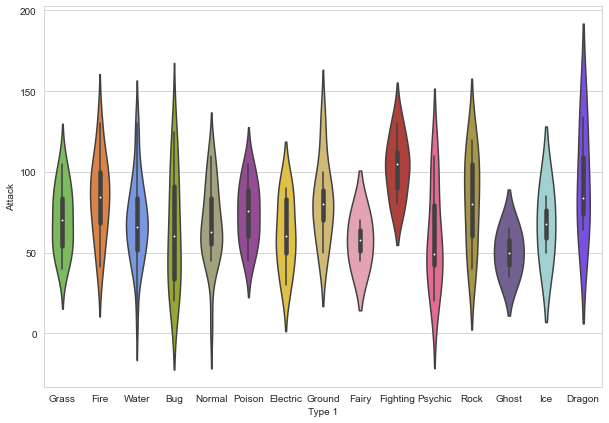

In [10]:
plt.figure(figsize=(10,7))
sns.violinplot(x = "Type 1", y= "Attack", data= df, palette= pkmn_type_colors)

Çok daha iyi oldu! Violin grafiği dağılımları görselleştirme konusunda gayet başarılı. Ama zaten 151 tane Pokémon olduğu için her birini nokta olarak gösterebiliriz.

Ve tam burda swarm (sürü) grafiği devreye giriyor. Bu grafik bize her bir noktayı gösteriyor, ayrıca benzer noktaları birlikte gösteriyor.

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

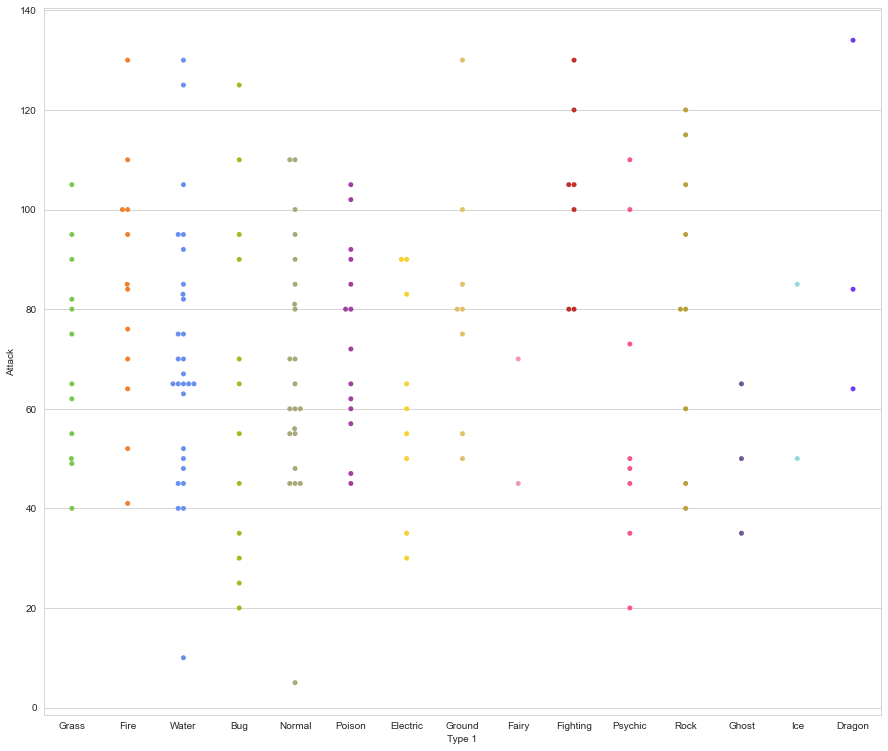

In [11]:
plt.figure(figsize=(15,13))
sns.swarmplot(x= "Type 1", y= "Attack",data= df ,palette= pkmn_type_colors)

şimdi bir de violin grafiği ile swarm grafiğini birleştirmeyi deyelim

İlk önce Matplotlib ile grafiğimizin büyüklüğünü büyütüyoruz.

Daha sonra violin grafiğimizi yapıyoruz. Ancak inner= argümanın değerini None olarak belirleyip violin grafiğinin içindeki sütunu kaldırıyoruz.

Daha sonra swarm grafiğini yapıyoruz. Bu sefer noktaları daha belli olması için siyah yapıyoruz.

Son olarak, Matplotlib ile grafiğin başlığını belirliyoruz.

Text(0.5, 1.0, 'Attack by Type')

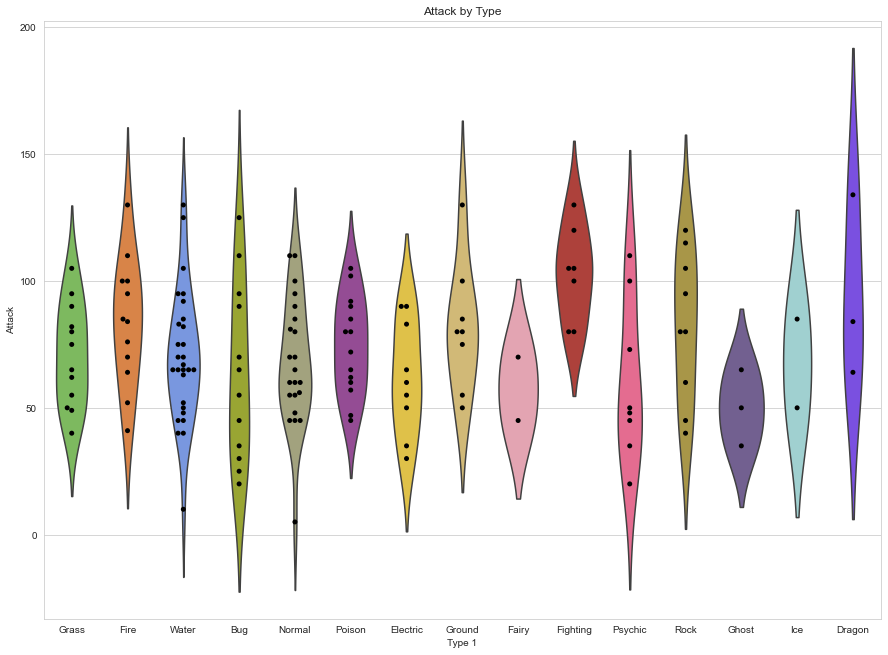

In [12]:
plt.figure(figsize=(15,11))
sns.violinplot(x = "Type 1", y= "Attack", data= df, inner= None, palette= pkmn_type_colors)
sns.swarmplot(x= "Type 1", y= "Attack",data= df ,color= "k")
plt.title("Attack by Type")

hepsini tek potada eritip grafiğe koyma şeysi melt fonk ile

Öncelikle, DataFrame’i eritiyoruz.

Sonra, tutmak istediğimiz sütunları belirtiyoruz.

Son olarak, erittiğimiz değişkene bir isim belirliyoruz.

In [13]:
melted_df = pd.melt(stats_df, id_vars=["Name", "Type 1", "Type 2"] , var_name="Stat" )
melted_df

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58
...,...,...,...,...,...
901,Dratini,Dragon,NaN,Speed,50
902,Dragonair,Dragon,NaN,Speed,70
903,Dragonite,Dragon,Flying,Speed,80
904,Mewtwo,Psychic,NaN,Speed,130


şimdi eritme işlemini becerdik. artık swarm grafiğini yapabiliriz.

Artık melted_df tablosu ile swarm grafiğini yapabiliriz.

Ama bu sefer, x ve y argümanlarını x='Stat' ve y='value' olarak belirleyeceğiz, bu sayede swarm grafiğimiz özellikler bazında ayrılmış olacaktır.

Daha sonra, hue argümanını hue='Type 1' olarak belirleyeceğiz, böylece grafik üzerindeki noktaları Pokémonların temel tiplerine göre renklendirmiş olacağız.

<AxesSubplot:xlabel='Stat', ylabel='value'>

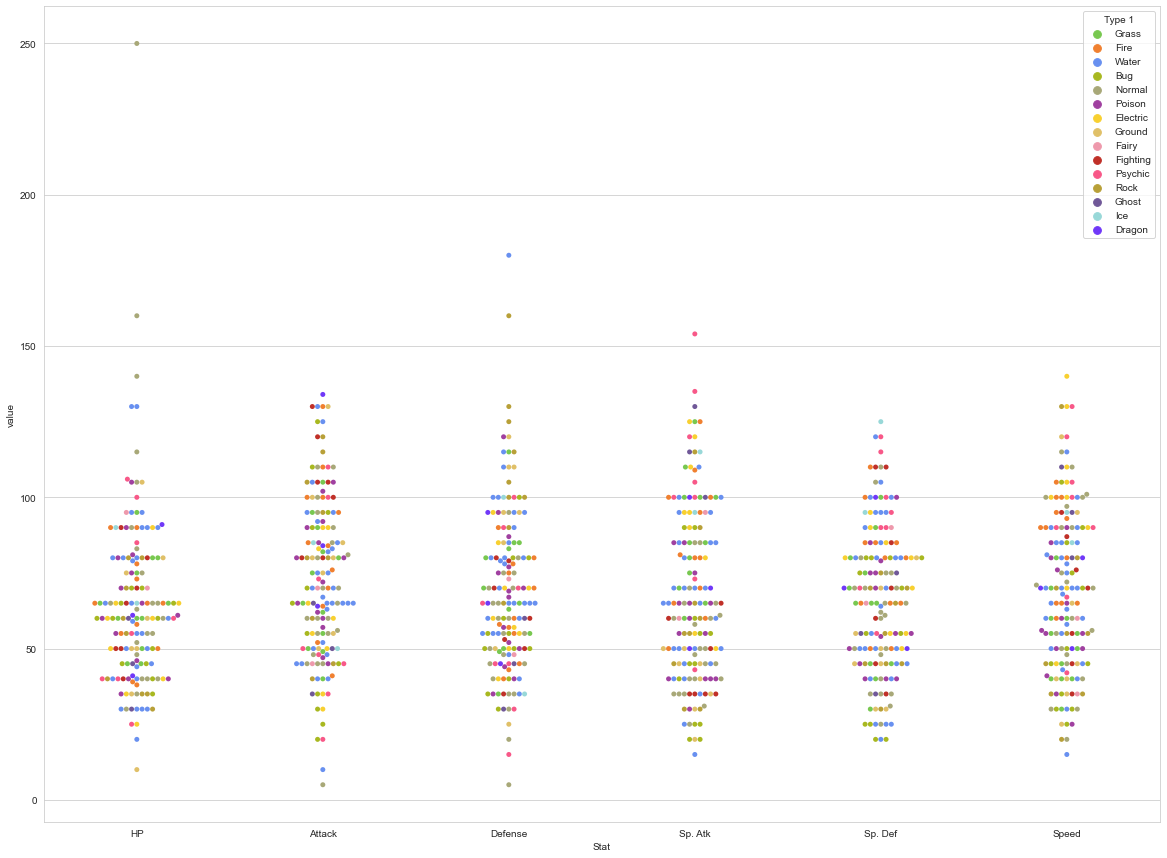

In [14]:
plt.figure(figsize=(20,15))
sns.swarmplot(x= "Stat", y= "value",data= melted_df, hue= "Type 1", palette=pkmn_type_colors)

pokedex
heatmap

<AxesSubplot:>

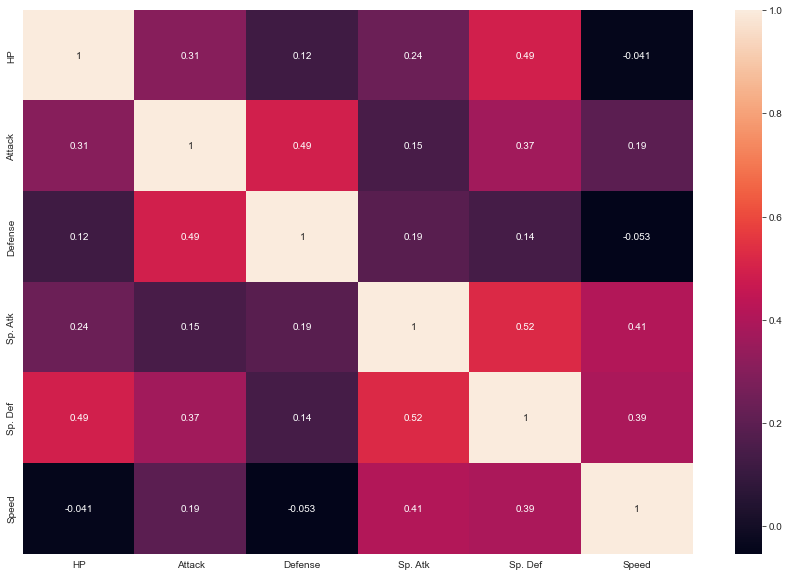

In [15]:
plt.figure(figsize=(15,10))
corr = stats_df.corr()
sns.heatmap(corr,annot=True)

histogram

c:\Users\DELL\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


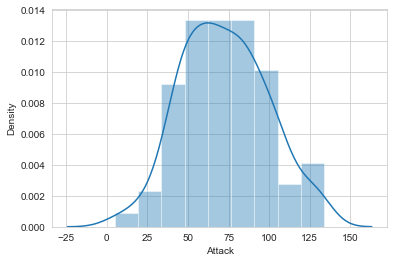

In [16]:
sns.distplot(df.Attack);

sütun grafiği

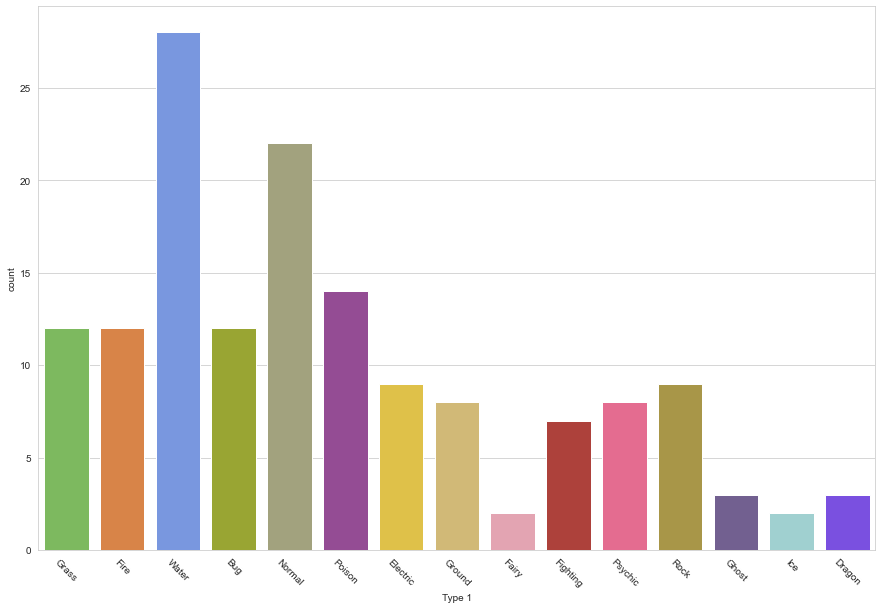

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(x= "Type 1", data= df, palette=pkmn_type_colors)
plt.xticks(rotation=-45); # sütun isimlerini çevirdik

faktör grafiği

Faktör grafiği, faktör sınıflarının grafiklerini kolayca ayırmaya yarar. 

c:\Users\DELL\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


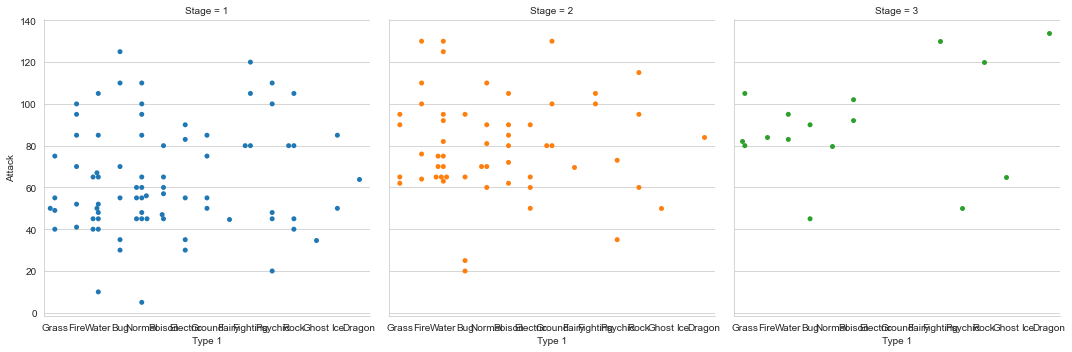

In [20]:
g = sns.factorplot(x= "Type 1", y= "Attack", data= df, hue= "Stage", col= "Stage", kind= "swarm")

#burada gelişim evrelerine göre atacklarının durmunu gözlemliyoruz.


yoğunluk grafiği
iki değişken arasındaki dağılımı gösterir


c:\Users\DELL\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

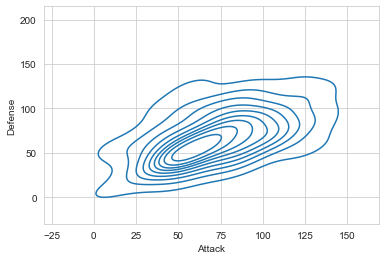

In [95]:
sns.kdeplot(df.Attack,df.Defense) # bu neye yarar anlamadım. en azından pokemonlar ile ilgili bu sette bana anlamlı gelen bir sonuç vermedi; 

son 
ortak dağılım grafiği 
saçılım ile histogramı birleştirerek bize iki değişkenli dağılımlar hakkında detaylı bilgi verir.

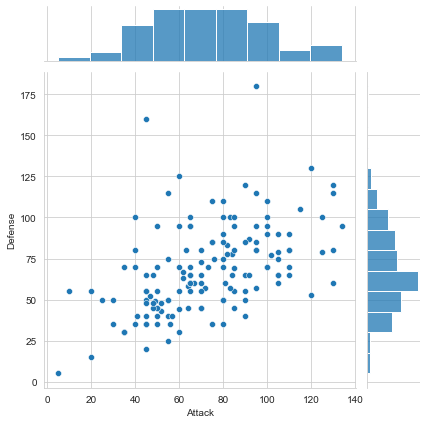

In [101]:
sns.jointplot(x = "Attack", y = "Defense", data= df);